# A neural network model for regression problems

We will see here how to use Keras to implement a simple neural network model for a **regression problem** (continuous target variable). 
For this practical session we are using a dataset on the relationship between the age of **wild bats** and **DNA methylation** at specific **CpG sites** 

The original data are available on Dryad: <a href='https://datadryad.org/stash/dataset/doi:10.5061/dryad.rn0198d'>here</a>
The corresponding paper is: <a href='https://onlinelibrary.wiley.com/doi/abs/10.1111/1755-0998.12925'>here</a>

In [85]:
DATASET_URL = 'https://raw.githubusercontent.com/ne1s0n/coding_excercises/master/data/DNA_methylation_data.csv'

### Loading libraries and getting the data

We first load some necessary libraries and get the data from the `github` repository

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#pandas can read a csv directly from a url
bat_data = pd.read_csv(DATASET_URL)
print(bat_data)

             Sample  Age Age category  ...  CpG GRIA2 1  CpG GRIA2 2  ASPA 1
0     BabyBechs_SHW    0      Age 0-3  ...          2.0          2.0    61.0
1   Dd_Juv_Hamgreen    0      Age 0-3  ...          1.0          2.0    59.0
2             A2402    1      Age 0-3  ...          1.0          5.0    48.0
3        A2414-2014    1      Age 0-3  ...          1.0          2.0    53.0
4        A8481-2014    1      Age 0-3  ...          2.0          2.0    41.0
..              ...  ...          ...  ...          ...          ...     ...
57       U5857_2014   12     Age 9-14  ...          8.0          4.0    61.0
58       U5870-2015   12     Age 9-14  ...          7.0         10.0    54.0
59       T7324_2014   14     Age 9-14  ...          7.0          5.0    22.0
60       T7326_2014   14     Age 9-14  ...          NaN          NaN     NaN
61       T7358-2014   14     Age 9-14  ...          5.0          7.0    50.0

[62 rows x 10 columns]


The dataset contains the **age of bats in years** (target variable) and the **percentage methylation** at **7 CpG sites** (epigenetic modifications: features).

## Data description and preprocessing

In [87]:
for col in bat_data.columns: 
    print(col)

Sample
Age
Age category
CpG 1 TET2
CpG 2 TET2
CpG 3 TET2
CpG 4 TET2
CpG GRIA2 1
CpG GRIA2 2
ASPA 1


There are 10 columns in the dataframe: we don't need the columns `Sample` and `Age category`, therefore we select the others into a cleaner dataframe:

In [88]:
bat_data = bat_data.iloc[:,[1,3,4,5,6,7,8,9]]
print(bat_data.head())
print("N. of records is: ",len(bat_data))

   Age  CpG 1 TET2  CpG 2 TET2  ...  CpG GRIA2 1  CpG GRIA2 2  ASPA 1
0    0        29.0        21.0  ...          2.0          2.0    61.0
1    0        30.0        21.0  ...          1.0          2.0    59.0
2    1        44.0        38.0  ...          1.0          5.0    48.0
3    1        48.0        36.0  ...          1.0          2.0    53.0
4    1         NaN         NaN  ...          2.0          2.0    41.0

[5 rows x 8 columns]
N. of records is:  62


We now describe the dataset, by producing some summary statistics on the entire dataframe:

In [89]:
bat_data.describe()

,Age,CpG 1 TET2,CpG 2 TET2,CpG 3 TET2,CpG 4 TET2,CpG GRIA2 1,CpG GRIA2 2,ASPA 1
count,62.000000,61.000000,61.000000,61.000000,61.000000,60.000000,60.000000,59.000000
mean,5.612903,57.114754,47.311475,60.885246,53.442623,2.933333,3.866667,49.949153
std,3.672471,9.259407,8.883582,10.264986,6.614440,1.903313,1.836233,8.398324
min,0.000000,29.000000,21.000000,24.000000,31.000000,0.000000,1.000000,22.000000
25%,3.000000,52.000000,42.000000,57.000000,51.000000,1.000000,2.000000,44.500000
50%,5.000000,59.000000,49.000000,62.000000,54.000000,3.000000,4.000000,52.000000
75%,7.750000,64.000000,53.000000,68.000000,58.000000,4.000000,5.000000,56.000000
max,14.000000,71.000000,62.000000,74.000000,70.000000,8.000000,10.000000,63.000000


We see that there are 62 records, but for some variables (columns) there are some missing datapoints. We can see below the distribution of missing datapoints per variable:

In [90]:
bat_data.isnull().sum()

Age            0
CpG 1 TET2     1
CpG 2 TET2     1
CpG 3 TET2     1
CpG 4 TET2     1
CpG GRIA2 1    2
CpG GRIA2 2    2
ASPA 1         3
dtype: int64

 We only keep complete (no missing datapoints) records:

In [91]:
bat_data = bat_data.dropna()
target_variable = bat_data[["Age"]]
features = bat_data.loc[:, bat_data.columns != 'Age']
print("Size of target variable: ", target_variable.shape)
print("Size of feature matrix: ", features.shape)

Size of target variable:  (58, 1)
Size of feature matrix:  (58, 7)


## Visualizing the data

### Histogram of the target variable

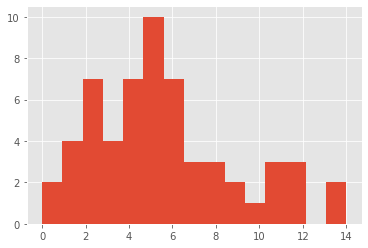

In [92]:
plt.hist(target_variable.to_numpy(), bins = 15)
plt.show()

## Training and test sets

We have a smaller dataset, and therefore we choose a different split for the size of the training and test sets: e.g. 12% 

In [93]:
#we import a function to perform the split
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features, target_variable, test_size=0.12)
    
#let's print some shapes to get an idea of the resulting data structure
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(51, 7)
(7, 7)
(51, 1)
(7, 1)


In [94]:
print(features_test)
print(target_test)

    CpG 1 TET2  CpG 2 TET2  CpG 3 TET2  ...  CpG GRIA2 1  CpG GRIA2 2  ASPA 1
35        66.0        51.0        68.0  ...          3.0          3.0    53.0
34        47.0        42.0        59.0  ...          3.0          2.0    51.0
9         53.0        41.0        60.0  ...          1.0          2.0    42.0
56        50.0        46.0        54.0  ...          3.0          2.0    43.0
31        58.0        48.0        62.0  ...          4.0          5.0    40.0
26        67.0        57.0        69.0  ...          4.0          4.0    47.0
7         61.0        47.0        69.0  ...          1.0          2.0    24.0

[7 rows x 7 columns]
    Age
35    5
34    5
9     2
56   12
31    5
26    5
7     2


## Building the neural networks model

We are now ready to build our neural networks model for regression. First, we set some hyperparameters:

- the activation function in the output layer in this case is **linear** (we get directly the results from $\sum wx + b$
- the loss function is MSE (**mean squared error**)

In [105]:
## # Configuration options
input_shape = (features.shape[1],) ## tuple that specifies the number of features 
hidden_nodes = 16
hidden_activation = 'relu'
output_activation = 'linear'
loss_function = 'mean_squared_error'
optimizer_used = 'rmsprop' ## or keras.optimizers.adam(lr=0.001)? maybe for softmax regression?
num_epochs = 100

In [96]:
print(input_shape)

(7,)


As we learnt to do throughout the course, we now use `keras` to build our sequential neural networks model:

In [97]:
#we are building a "sequential" model, meaning that the data will 
#flow like INPUT -> ELABORATION -> OUTPUT.
from keras.models import Sequential

#a "dense" layer is a layer were all the data coming in are connected
#to all nodes.
from keras.layers import Dense

# binary classification shallow neural network model in Keras
model = Sequential()
model.add(Dense(units=hidden_nodes, input_shape=input_shape, activation=hidden_activation))
model.add(Dense(1, activation=output_activation))

#the model is declared, but we still need to compile it to actually
#build all the data structures
model.compile(optimizer=optimizer_used, loss=loss_function)

In [98]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 16)                128       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________
None


The `model.summary()` tells us that we now have 145 model parameters to learn: 

- hidden layer: 7 feature weights x 16 units + 16 b terms $\rightarrow$ 128 parameters
- output layer: 16 unit weights + 1 bias term = 17 parameters  

### Training the neural network model

In [99]:
history = model.fit(features_train, target_train, epochs=num_epochs, validation_data=(features_test, target_test), verbose = 0)

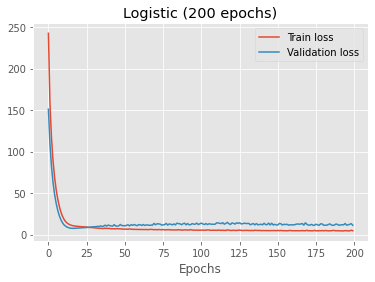

In [100]:
def plot_loss_history(h, title):
    plt.plot(h.history['loss'], label = "Train loss")
    plt.plot(h.history['val_loss'], label = "Validation loss")
    plt.xlabel('Epochs')
    plt.title(title)
    plt.legend()
    plt.show()

plot_loss_history(history, 'Logistic ({} epochs)'.format(num_epochs))

## Predictions

We can now see the predictions our neural networks model produced for the age of bats based on epigenetics marks; below we report also the known target values (ages) from the test set 

In [101]:
predictions = model.predict(features_test)
print(predictions)

[[5.0069795]
 [4.557696 ]
 [3.7248402]
 [5.116004 ]
 [7.418764 ]
 [7.2927427]
 [6.0645685]]


In [102]:
print(target_test)

    Age
35    5
34    5
9     2
56   12
31    5
26    5
7     2


In regression problems you can not use the same accuracy metrics as in classification problems (e.g. error rate, confusion matrix, etc.): in stead, other metrics are used like:

- **Pearson linear correlation**
- **Spearman rank correlation**
- **RMSE** (root mean squared error)
- **MAE** (mean absolute error)
- etc. (there are many more)

In [103]:
y_pred = pd.Series(predictions[:,0])
y = pd.Series(target_test.iloc[:,0].to_numpy().astype(float))
accuracy = y.corr(y_pred, method='pearson')
print("accuracy (measured as Pearson's correlation) is: ", accuracy)

accuracy (measured as Pearson's correlation) is:  0.030423445815369658



A scatter plot of predicted vs true values can also be useful to visualise the result of the model:



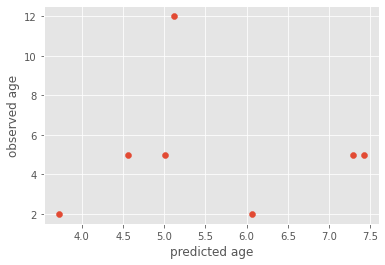

In [104]:
plt.style.use('ggplot')

plt.scatter(predictions, y)
plt.xlabel("predicted age")
plt.ylabel("observed age")
plt.show()